In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('train_results_tmp.csv', names=['model_id', 'batch_size', 'episode', 'score'])

In [7]:
model_1 = df[df['model_id']==0][['episode', 'score']]

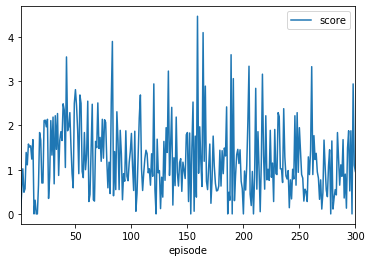

In [8]:
model_1 = model_1.set_index('episode')
model_1.plot()

In [1]:
import glob

In [2]:
results_dirs = glob.glob('./training_*/')
print(results_dirs)

['./training_2/', './training_5/', './training_4/', './training_1/', './training_1_1/', './training_2_1/', './training_3/']


In [85]:
df_results_tmp_list = []
df_results_list = []
df_results_details_list = []
for results_dir in results_dirs:
    df_tmp = pd.read_csv(results_dir + 'train_results_tmp.csv', names=['model_id', 'model_tag', 'episode', 'score'])
    df = pd.read_csv(results_dir + 'train_results.csv', names=['model_id', 'model_tag', 'episode', 'score'])
    df_results_tmp_list.append(df_tmp)
    df_results_list.append(df)
    
    training_batch = results_dir.replace('/', '').replace('.', '')
    df_details = df.copy()
    df_details['batch'] = training_batch
    model_tags = ['batch_size', 'learn_step', 'actor_lr', 'critic_lr', 'noise_theta', 'noise_sigma', 'actor_nn', 'critic_nn']
    for i in range(len(model_tags)):
        model_tag = model_tags[i]
        df_details[model_tag] = df_details.apply(lambda row: row['model_tag'].split('_')[i], axis=1)
    df_results_details_list.append(df_details)

df_results_tmp = pd.concat(df_results_tmp_list, axis=0, sort=False)
df_results = pd.concat(df_results_list, axis=0, sort=False)
df_details = pd.concat(df_results_details_list, axis=0, sort=False)

display(df_results_tmp.iloc[:5])
display(df_results.iloc[:5])
display(df_details.iloc[:5])

,model_id,model_tag,episode,score
0,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),1,0.23
1,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),2,1.04
2,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),3,0.53
3,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),4,0.54
4,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),5,0.44


,model_id,model_tag,episode,score
0,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),100,0.8104
1,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),200,1.1250
2,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),300,0.9752
3,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),400,1.0300
4,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),500,1.0900


,model_id,model_tag,episode,score,batch,batch_size,learn_step,actor_lr,critic_lr,noise_theta,noise_sigma,actor_nn,critic_nn
0,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),100,0.8104,training_2,50,1,0.001,0.001,0.15,0.2,(400; 300),(400; 300)
1,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),200,1.1250,training_2,50,1,0.001,0.001,0.15,0.2,(400; 300),(400; 300)
2,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),300,0.9752,training_2,50,1,0.001,0.001,0.15,0.2,(400; 300),(400; 300)
3,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),400,1.0300,training_2,50,1,0.001,0.001,0.15,0.2,(400; 300),(400; 300)
4,0,50_1_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),500,1.0900,training_2,50,1,0.001,0.001,0.15,0.2,(400; 300),(400; 300)


In [86]:
df_results_tmp_max = df_results_tmp[['model_tag','score']].groupby('model_tag').max()
df_results_tmp_max = df_results_tmp_max.sort_values('score', ascending=False)
display(df_results_tmp_max)

,score
model_tag,
100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),32.149999
200_12_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),29.249999
150_12_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),19.630000
100_4_0.001_0.001_0.15_0.2_(256; 256)_(256; 256),17.670000
50_8_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),16.440000
...,...
50_16_0.001_0.001_0.15_0.2_(128; 128)_(128; 128),0.850000
50_12_0.001_0.001_0.15_0.2_(128; 128)_(128; 128),0.580000
50_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),0.540000


In [87]:
df_results_max = df_results[['model_tag','score']].groupby('model_tag').max()
df_results_max = df_results_max.sort_values('score', ascending=False)
display(df_results_max)

,score
model_tag,
100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),11.6081
200_12_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),5.3019
50_8_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),5.2886
100_4_0.001_0.001_0.15_0.2_(256; 256)_(256; 256),3.7279
200_4_0.001_0.001_0.15_0.2_(400; 300)_(400; 300),3.7011
...,...
50_12_0.001_0.001_0.15_0.2_(128; 128)_(128; 128),0.0650
50_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),0.0568
50_20_0.001_0.001_0.15_0.2_(128; 128)_(128; 128),0.0544


In [18]:
display(df_results_tmp[df_results_tmp['model_tag']=='100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)'])

,model_id,model_tag,episode,score
9000,9,100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),1,0.020000
9001,9,100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),2,0.000000
9002,9,100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),3,0.000000
9003,9,100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),4,0.000000
9004,9,100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),5,0.000000
...,...,...,...,...
9995,9,100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),996,15.720000
9996,9,100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),997,14.570000
9997,9,100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),998,10.220000
9998,9,100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128),999,23.269999


In [38]:
def plot_model(model_tag, all_points=True, kind='line'):
    print(model_tag)
    if all_points:
        df = df_results_tmp.copy()
    else:
        df = df_results.copy()
    df_plot = df[df['model_tag']==model_tag][['episode','score']]
    df_plot = df_plot.set_index('episode')
    df_plot.plot(kind=kind)

In [90]:
plot_model("100_8_0.001_0.001_0.15_0.1_(128, 128)_(128, 128)", all_points=True)

100_8_0.001_0.001_0.15_0.1_(128, 128)_(128, 128)


TypeError: no numeric data to plot

100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)
50_8_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)
100_4_0.001_0.001_0.15_0.2_(256; 256)_(256; 256)
200_4_0.001_0.001_0.15_0.2_(400; 300)_(400; 300)
100_12_0.001_0.001_0.15_0.2_(256; 256)_(256; 256)
150_12_0.001_0.001_0.15_0.2_(400; 300)_(400; 300)
100_1_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)
150_12_0.0001_0.001_0.15_0.2_(400; 300)_(400; 300)
50_8_0.001_0.001_0.15_0.2_(256; 256)_(256; 256)
150_4_0.001_0.001_0.15_0.2_(400; 300)_(400; 300)
150_20_0.0001_0.001_0.15_0.2_(400; 300)_(400; 300)
150_8_0.001_0.001_0.15_0.2_(400; 300)_(400; 300)
100_12_0.001_0.001_0.15_0.2_(400; 300)_(400; 300)
100_8_0.0001_0.001_0.15_0.2_(400; 300)_(400; 300)
150_8_0.0001_0.001_0.15_0.2_(400; 300)_(400; 300)


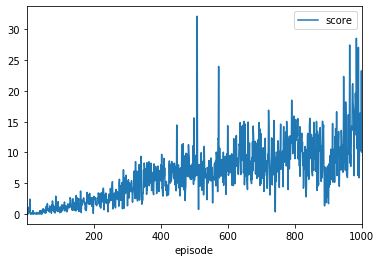

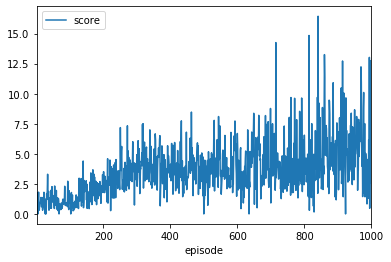

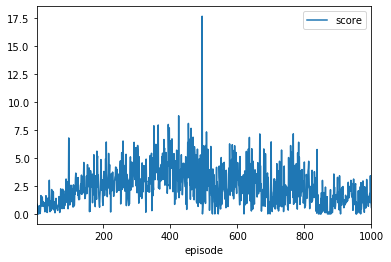

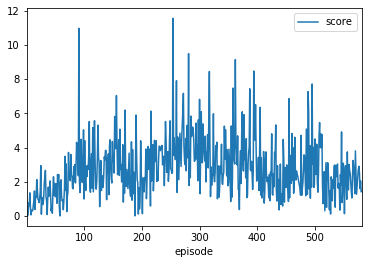

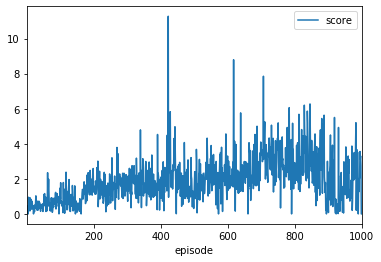

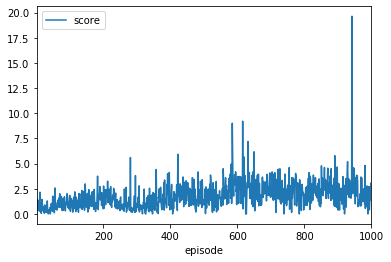

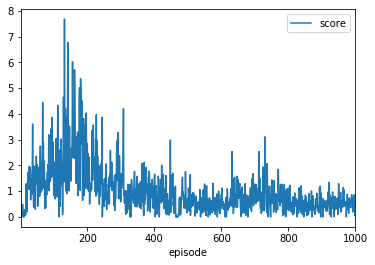

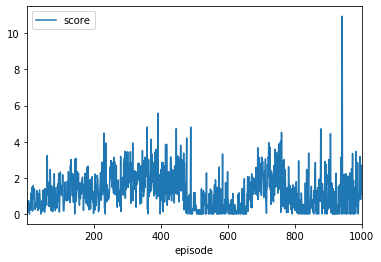

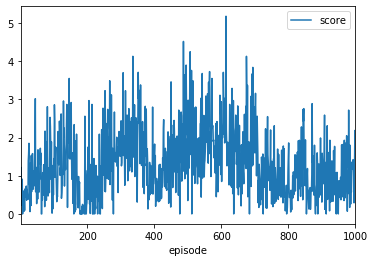

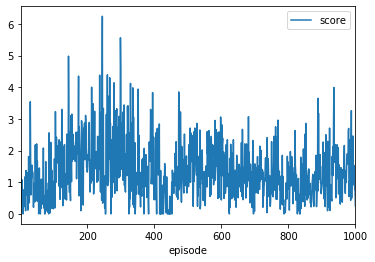

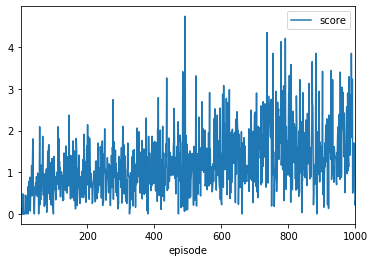

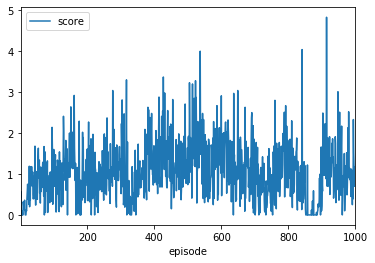

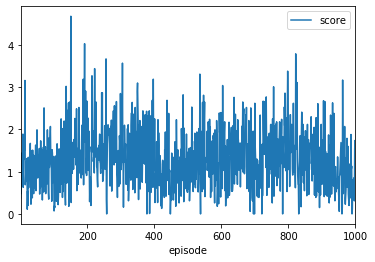

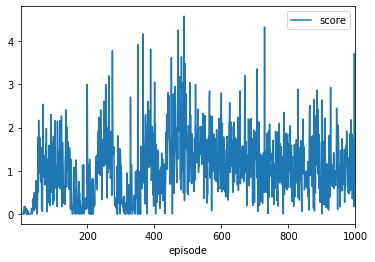

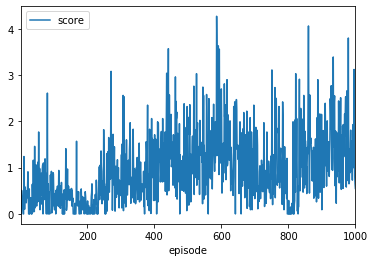

In [45]:
for i in range(15):
    model_tag = df_results_max.index[i]
    plot_model(model_tag)

100_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)
200_12_0.001_0.001_0.15_0.2_(400; 300)_(400; 300)
50_8_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)
100_4_0.001_0.001_0.15_0.2_(256; 256)_(256; 256)
200_4_0.001_0.001_0.15_0.2_(400; 300)_(400; 300)


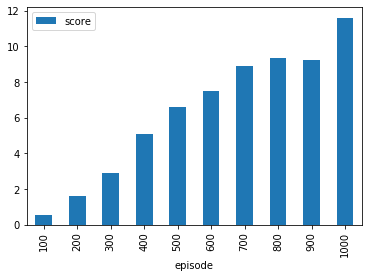

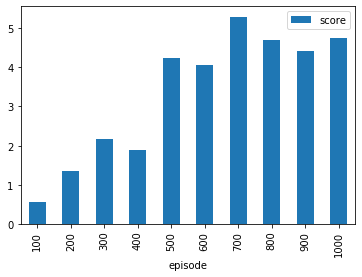

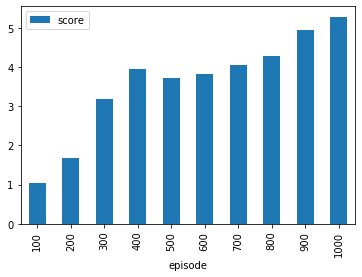

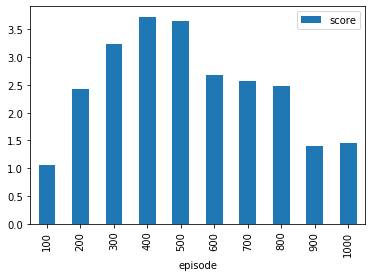

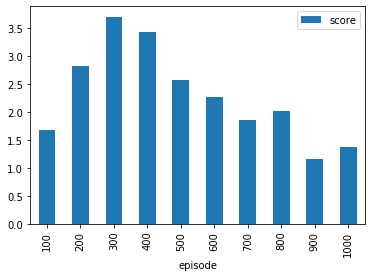

In [88]:
for i in range(5):
    model_tag = df_results_max.index[i]
    plot_model(model_tag, all_points=False, kind='bar')

In [89]:
df_details_summary = df_details[df_details['episode']==1000]
model_tags_dict = {}
for model_tag in model_tags:
    model_tags_dict[model_tag] = df_details_summary[model_tag].unique()

summary_dict = {'max': [], 'mean': [], 'count': []}
index_list = []
for t in model_tags_dict:
    df_max = df_details_summary[[t, 'score']].groupby(t).max()
    df_mean = df_details_summary[[t, 'score']].groupby(t).mean()
    df_count = df_details_summary[[t, 'score']].groupby(t).count()
    for v in model_tags_dict[t]:
        summary_dict['max'].append(round(df_max.loc[v]['score'], 2))
        summary_dict['mean'].append(round(df_mean.loc[v]['score'], 2))
        summary_dict['count'].append(df_count.loc[v]['score'])
        index_list.append((t, v))

summary_df = pd.DataFrame.from_dict(summary_dict)
index_mult = pd.MultiIndex.from_tuples(index_list, names=['tag_type', 'tag_value'])
summary_df = summary_df.set_index(index_mult)
display(summary_df)

max  mean  count
tag_type    tag_value                     
batch_size  50           5.29  0.62     30
            100         11.61  1.16     25
            150          2.35  1.08     12
            200          4.75  1.64     10
learn_step  1            1.01  0.62     14
            4            1.45  0.71     13
            8            5.29  1.28     13
            12          11.61  1.87     13
            16           2.81  0.85     13
            20           1.65  0.63     11
actor_lr    0.001       11.61  1.09     54
            0.0001       2.75  0.78     23
critic_lr   0.001       11.61  1.00     77
noise_theta 0.15         4.75  0.87     65
            0.0         11.61  1.67     12
noise_sigma 0.2          4.75  0.87     65
            0.0         11.61  1.67     12
actor_nn    (400; 300)   4.75  0.96     46
            (256; 256)   1.73  0.90     12
            (128; 128)  11.61  1.15     19
critic_nn   (400; 300)   4.75  0.96     46
            (256; 256)   1.73  0.90     12
            (128; 128)  11.61  1.15     19